In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


kapaa us
ushuaia ar
lavrentiya ru
dikson ru
saint-philippe re
vardo no
hervey bay au
vaini to
vaini to
hyeres fr
san carlos del zulia ve
ushuaia ar
camacari br
kapaa us
padre paraiso br
khatanga ru
hermanus za
ushuaia ar
emiliano zapata mx
mut tr
greensburg us
kavieng pg
liuzhou cn
mataura pf
rocha uy
manaus br
half moon bay us
cairns au
bluff nz
busselton au
avarua ck
hilo us
clyde river ca
rikitea pf
hermanus za
ushuaia ar
qaanaaq gl
hamilton bm
kapaa us
kidal ml
norman wells ca
kadykchan ru
busselton au
kapaa us
kavieng pg
marsh harbour bs
punta arenas cl
constitucion mx
yaan cn
aripuana br
punta arenas cl
yellowknife ca
maniitsoq gl
guerrero negro mx
rikitea pf
cape town za
east london za
vaini to
klaksvik fo
isangel vu
vaini to
itarema br
logrono es
sorvag fo
belushya guba ru
ojitlan mx
saskylakh ru
kuche cn
lebu cl
grinnell us
rio grande br
pimentel pe
pacific grove us
carnarvon au
charters towers au
tasiilaq gl
rikitea pf
bredasdorp za
ilulissat gl
illoqqortoormiut gl
punta aren

dikson ru
rocha uy
castro cl
mataura pf
rikitea pf
tilichiki ru
punta arenas cl
pacific grove us
karamea nz
daru pg
dhidhdhoo mv
hofn is
bani walid ly
lagoa pt
yellowknife ca
opuwo na
rochegda ru
punta arenas cl
sao filipe cv
kamien pomorski pl
hasaki jp
aksu kz
robinson us
jibuti dj
ushuaia ar
hermanus za
hithadhoo mv
mys shmidta ru
rikitea pf
marzuq ly
port hedland au
aykhal ru
albany au
vaini to
ribeira grande pt
ust-kamchatsk ru
kavieng pg
santa pe
nome us
port alfred za
halalo wf
georgetown sh
cidreira br
aktau kz
maymyo mm
saskylakh ru
jamestown sh
lengshuijiang cn
vaini to
myitkyina mm
barentsburg sj
bur gabo so
meyungs pw
illoqqortoormiut gl
atuona pf
rikitea pf
maridi sd
talnakh ru
hilo us
castro cl
lebu cl
sitka us
lata sb
byron bay au
barrow us
the valley ai
bluff nz
barentsburg sj
ponta do sol cv
hermanus za
bocana de paiwas ni
punta arenas cl
victoria sc
erenhot cn
georgetown gy
rikitea pf
sentyabrskiy ru
dingli mt
hilo us
mataura pf
khatanga ru
ushuaia ar
tezu in
vestmann

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | lavrentiya
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | hervey bay
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | hyeres
Processing Record 10 of Set 1 | san carlos del zulia
Processing Record 11 of Set 1 | camacari
Processing Record 12 of Set 1 | padre paraiso
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | emiliano zapata
Processing Record 16 of Set 1 | mut
Processing Record 17 of Set 1 | greensburg
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | liuzhou
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | rocha
Processing Record 22 of Set 1 | manaus
Processing Record 23 of Set 1 | half m

Processing Record 35 of Set 4 | sainte-martine
Processing Record 36 of Set 4 | geraldton
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | algeciras
Processing Record 39 of Set 4 | artyk
City not found. Skipping...
Processing Record 40 of Set 4 | brae
Processing Record 41 of Set 4 | volodarka
Processing Record 42 of Set 4 | bondo
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | tezu
Processing Record 45 of Set 4 | leh
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | svetlyy
Processing Record 48 of Set 4 | esso
Processing Record 49 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 50 of Set 4 | aykhal
Processing Record 1 of Set 5 | riyadh
Processing Record 2 of Set 5 | kieta
Processing Record 3 of Set 5 | wetaskiwin
Processing Record 4 of Set 5 | berbera
Processing Record 5 of Set 5 | nizwa
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | leningr

Processing Record 23 of Set 8 | talara
Processing Record 24 of Set 8 | altamira
Processing Record 25 of Set 8 | ulaanbaatar
Processing Record 26 of Set 8 | salalah
Processing Record 27 of Set 8 | strijen
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | iskateley
Processing Record 31 of Set 8 | olafsvik
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | champerico
Processing Record 34 of Set 8 | conceicao da barra
Processing Record 35 of Set 8 | port augusta
Processing Record 36 of Set 8 | galle
Processing Record 37 of Set 8 | berezovyy
Processing Record 38 of Set 8 | senador jose porfirio
Processing Record 39 of Set 8 | raudeberg
Processing Record 40 of Set 8 | padre bernardo
Processing Record 41 of Set 8 | karaul
City not found. Skipping...
Processing Record 42 of Set 8 | cap-aux-meules
Processing Record 43 of Set 8 | verkhoyansk
Processing Record 44 of Set 8 | kaabong
Processing 

Processing Record 12 of Set 12 | avera
Processing Record 13 of Set 12 | carupano
Processing Record 14 of Set 12 | emba
Processing Record 15 of Set 12 | hovd
Processing Record 16 of Set 12 | mareeba
Processing Record 17 of Set 12 | margate
Processing Record 18 of Set 12 | bodden town
Processing Record 19 of Set 12 | sinj
Processing Record 20 of Set 12 | ahipara
Processing Record 21 of Set 12 | batagay-alyta
Processing Record 22 of Set 12 | fukue
Processing Record 23 of Set 12 | amahai
Processing Record 24 of Set 12 | nhulunbuy
Processing Record 25 of Set 12 | ust-uda
Processing Record 26 of Set 12 | mecca
Processing Record 27 of Set 12 | mount gambier
Processing Record 28 of Set 12 | doka
Processing Record 29 of Set 12 | xiuyan
Processing Record 30 of Set 12 | koyilandi
City not found. Skipping...
Processing Record 31 of Set 12 | nha trang
Processing Record 32 of Set 12 | okha
Processing Record 33 of Set 12 | yokadouma
Processing Record 34 of Set 12 | khromtau
Processing Record 35 of Se

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,78.78,78,100,12.66,US,2022-03-13 05:44:08
1,Ushuaia,-54.8000,-68.3000,47.86,61,75,14.97,AR,2022-03-13 05:44:09
2,Lavrentiya,65.5833,-171.0000,4.14,69,2,9.13,RU,2022-03-13 05:44:09
3,Dikson,73.5069,80.5464,-8.57,93,100,18.41,RU,2022-03-13 05:44:10
4,Saint-Philippe,-21.3585,55.7679,77.22,88,65,13.94,RE,2022-03-13 05:44:10
5,Vardo,70.3705,31.1107,31.08,85,76,7.70,NO,2022-03-13 05:44:10
6,Hervey Bay,-25.2986,152.8535,79.02,63,27,11.01,AU,2022-03-13 05:44:11
7,Vaini,-21.2000,-175.2000,82.56,89,40,2.30,TO,2022-03-13 05:44:11
8,Hyeres,43.1167,6.1167,50.67,71,100,19.57,FR,2022-03-13 05:44:12
9,San Carlos Del Zulia,9.0000,-71.9135,74.57,92,96,3.53,VE,2022-03-13 05:44:12


In [11]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-03-13 05:44:08,22.0752,-159.3190,78.78,78,100,12.66
1,Ushuaia,AR,2022-03-13 05:44:09,-54.8000,-68.3000,47.86,61,75,14.97
2,Lavrentiya,RU,2022-03-13 05:44:09,65.5833,-171.0000,4.14,69,2,9.13
3,Dikson,RU,2022-03-13 05:44:10,73.5069,80.5464,-8.57,93,100,18.41
4,Saint-Philippe,RE,2022-03-13 05:44:10,-21.3585,55.7679,77.22,88,65,13.94
...,...,...,...,...,...,...,...,...,...
571,Srednekolymsk,RU,2022-03-13 05:47:47,67.4500,153.6833,-0.06,94,100,6.64
572,Imeni Poliny Osipenko,RU,2022-03-13 05:47:48,52.4201,136.4853,24.51,77,99,3.40
573,Quatre Cocos,MU,2022-03-13 05:47:48,-20.2078,57.7625,84.09,81,68,12.03
574,Samana,DO,2022-03-13 05:47:48,19.2056,-69.3369,73.78,91,29,4.34


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/12/22'

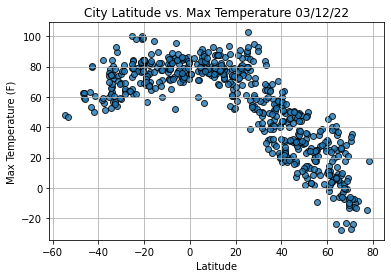

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

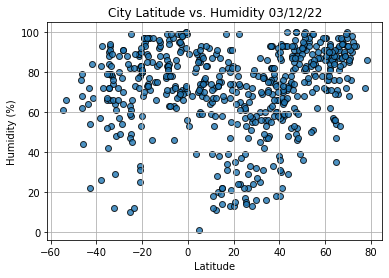

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

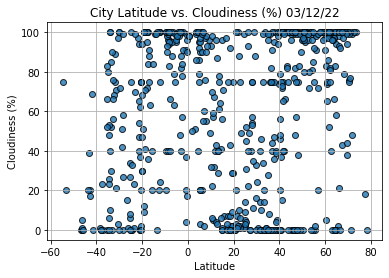

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

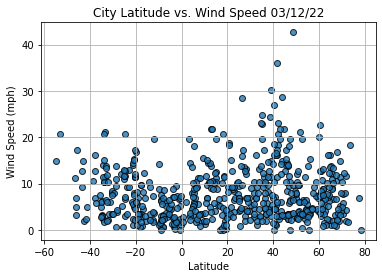

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [25]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [26]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

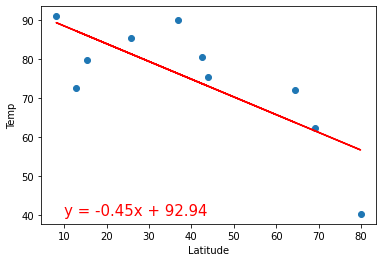

In [27]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [30]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [32]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                     Hermanus
Country                        ZA
Date          2022-03-13 05:44:14
Lat                      -34.4187
Lng                       19.2345
Max Temp                    61.81
Humidity                       84
Cloudiness                     26
Wind Speed                  13.96
Name: 13, dtype: object

In [34]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
571     True
572     True
573    False
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [35]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-03-13 05:44:08,22.0752,-159.3190,78.78,78,100,12.66
2,Lavrentiya,RU,2022-03-13 05:44:09,65.5833,-171.0000,4.14,69,2,9.13
3,Dikson,RU,2022-03-13 05:44:10,73.5069,80.5464,-8.57,93,100,18.41
5,Vardo,NO,2022-03-13 05:44:10,70.3705,31.1107,31.08,85,76,7.70
8,Hyeres,FR,2022-03-13 05:44:12,43.1167,6.1167,50.67,71,100,19.57


In [36]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

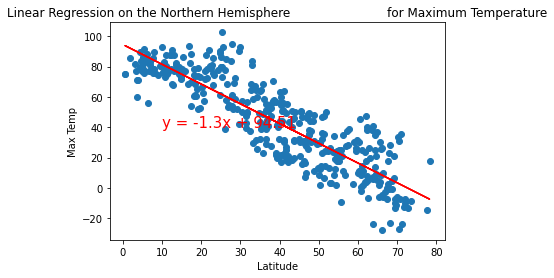

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

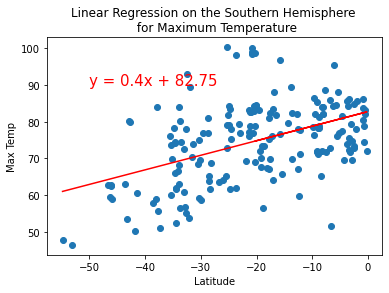

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

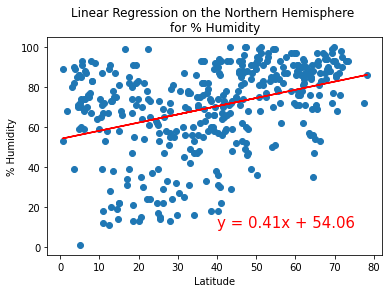

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

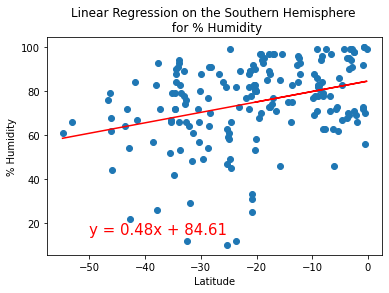

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

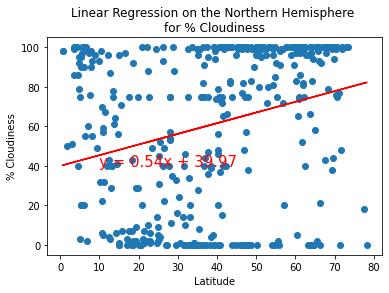

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))


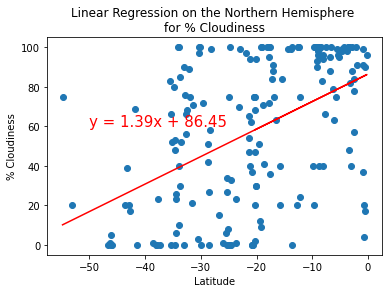

In [48]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))


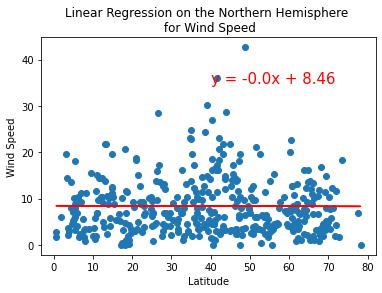

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (Temp/ipykernel_2640/1225207314.py, line 6)